In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
df_train = pd.read_parquet('./data/yellow_tripdata_2023-01.parquet')

In [3]:
df_train.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,9.3,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,7.9,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,14.9,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,12.1,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,11.4,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00


In [4]:
len(df_train.columns)

19

In [5]:
df_train['duration'] =  df_train['tpep_dropoff_datetime'] - df_train['tpep_pickup_datetime']
df_train.head(2)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,duration
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,9.3,1.0,0.5,0.0,0.0,1.0,14.3,2.5,0.0,0 days 00:08:26
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,7.9,1.0,0.5,4.0,0.0,1.0,16.9,2.5,0.0,0 days 00:06:19


In [6]:
df_train['duration'] = df_train.duration.apply(lambda td: td.total_seconds()/60)
df_train.head(2)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,duration
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,9.3,1.0,0.5,0.0,0.0,1.0,14.3,2.5,0.0,8.433333
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,7.9,1.0,0.5,4.0,0.0,1.0,16.9,2.5,0.0,6.316667


In [7]:
np.std(df_train.duration)

42.59434429744777

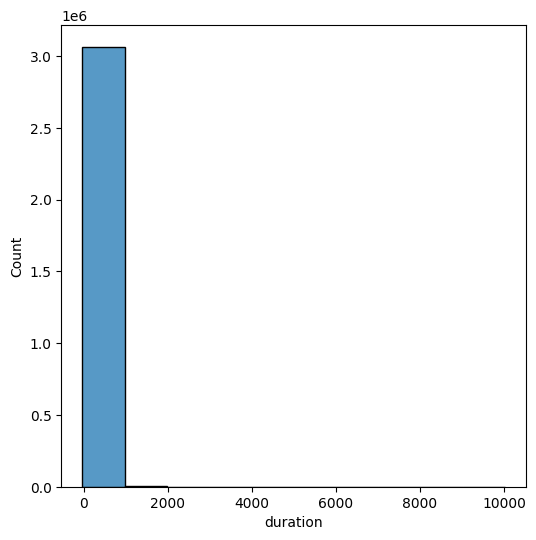

In [8]:
plt.figure(figsize=(6,6))
sns.histplot(df_train.duration,bins=10)
plt.show()

In [9]:
df_before = len(df_train)
df_filtered = df_train[(df_train.duration > 1) & (df_train.duration < 60)]
df_after = len(df_filtered)

In [10]:
df_after / df_before  * 100

98.11146334607858

In [11]:
categories =  ['PULocationID','DOLocationID']

In [12]:
df_filtered[categories] = df_filtered[categories].astype(str)

/tmp/ipykernel_15105/34350381.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered[categories] = df_filtered[categories].astype(str)


In [13]:
dv = DictVectorizer()
train_dicts = df_filtered[categories].to_dict(orient='records')
X_train = dv.fit_transform(train_dicts)

In [14]:
X_train

<3008849x515 sparse matrix of type '<class 'numpy.float64'>'
	with 6017698 stored elements in Compressed Sparse Row format>

In [15]:
y_train = df_filtered['duration'].values
y_train


array([ 8.43333333,  6.31666667, 12.75      , ..., 24.51666667,
       13.        , 14.4       ])

In [16]:
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_train)
mean_squared_error(y_train,y_pred,squared=False)

/opt/conda/envs/faran/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


7.647512074896299

In [17]:
df_val = pd.read_parquet('./data/yellow_tripdata_2023-02.parquet')
df_val.head(2)

: 

In [ ]:
df_val['duration'] = df_val['tpep_dropoff_datetime'] - df_val['tpep_pickup_datetime']
df_val['duration'] = df_val.duration.apply(lambda td:td.total_seconds()/60)
df_val = df_val[( df_val.duration > 0 ) & ( df_val.duration < 60 )] 

NameError: name 'df_val' is not defined